In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('C:/Users/Ant Pc/Theoritical Biophysics/Quiz 1/ME17B037_QI.csv')
data.head()

import math
def vsfunc(alpha,kappa,epsilon,delt):
    
    tots=math.ceil(1/delt)
    vs=[]
    vs1=[]
    vsd=0.00001
    sd=w=1
    
    while w<=tots:
        vs.append(sd)
        vs1.append(vsd)
        w = w + 1
        vsd = vsd - delt * (-1.0 + alpha * vsd / ((epsilon - vsd) * sd - kappa * vsd))
        sd = sd - delt
        
        if sd <= 0:
            sd = 0 
            vsd = 0
            
        if vsd < 0:
            vsd = 0
        
        if sd >= 1:
            sd = 1
            vsd = 0
            
        if vsd > 1: 
            vsd = 1
    
    r=np.array(vs)
    j=np.array(vs1)
    a=np.zeros([tots,2])
    a[:,0]=r
    a[:,1]=j
    return a

In [23]:
a=vsfunc(0.99,0.99,10.99,0.001)

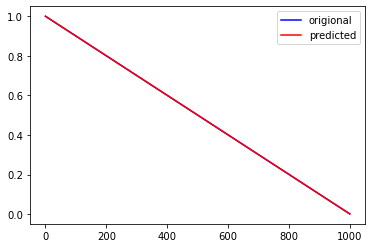

In [24]:
import matplotlib.pyplot as plt

plt.plot([x for x in range(1000)], data.iloc[:,0],'-b', label='origional')
plt.plot([x for x in range(1000)], a[:,0],'-r', label='predicted')
plt.legend(loc='best')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(a[:,1],data.iloc[:,1])

1.9507972388430727e-08

In [15]:
mean_squared_error(a[:,0],data.iloc[:,0])

2.642297349391907e-31